In [140]:
#Importing the important Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   
import matplotlib.style
plt.style.use('ggplot')
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [141]:
#Loading train and test dataset
df_train=pd.read_excel("Final_Train.xlsx")
df_test=pd.read_excel("Final_Test.xlsx")

In [142]:
#Displaying all the columns
pd.set_option('display.max_columns',None)


In [143]:
#Seeing the first 5 rows of training data
df_train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [144]:
# Check shape of dataset

df_train.shape, df_test.shape

((5961, 7), (1987, 6))

In [145]:
# Check test column types

col = df_test.dtypes.reset_index()
col.columns = ["Count", "Column Type"]
col.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,object,6


## Train Data

In [146]:
#Checking Train Data Columns
df_train.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info', 'Fees'],
      dtype='object')

In [147]:
#Checking for NULL values
df_train.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

In [148]:
#Let's check the percentage of NULL Values
round(df_train.isnull().sum()/len(df_train)*100,2)

Qualification          0.00
Experience             0.00
Rating                55.39
Place                  0.42
Profile                0.00
Miscellaneous_Info    43.95
Fees                   0.00
dtype: float64

In [149]:
#Miscellaneous_Info is having a very high percentage of missing values. We can drop the column as imputing makes no sense here
df_train.drop("Miscellaneous_Info",axis=1,inplace=True)

**Now, another thing to consider here is rating. This can be an important deciding variable. Nowadays, we are using apps like Practo and 1mg for online consultation of Doctors. There also, we see a lot of listings where the ratings are absent. We can categorise ratings from 0 to 10 and place the missing values in 0 rating. Similarly, 90-100% will have 10 rating, 80-89 will have 9 rating and so on.**

In [150]:
#Let us first convert rating into integer
df_train['Rating'].fillna('-1%', inplace=True)

In [151]:
df_train.isnull().sum()

Qualification     0
Experience        0
Rating            0
Place            25
Profile           0
Fees              0
dtype: int64

In [152]:
#Removing the % symbol 
df_train['Rating']=df_train['Rating'].str.replace('[^.\d]','')

In [153]:
df_train.head()

,Qualification,Experience,Rating,Place,Profile,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100,"Kakkanad, Ernakulam",Homeopath,100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98,"Whitefield, Bangalore",Ayurveda,350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,1,"Mathikere - BEL, Bangalore",ENT Specialist,300
3,"BSc - Zoology, BAMS",12 years experience,1,"Bannerghatta Road, Bangalore",Ayurveda,250
4,BAMS,20 years experience,100,"Keelkattalai, Chennai",Ayurveda,250


In [154]:
#Converting into int and creating bins in various categories
df_train['Rating']=df_train['Rating'].astype(int)
bins = [-5,0,10,20,30,40,50,60,70,80,90,100]
labels = [i for i in range(11)]
df_train["Rating"] = pd.cut(df_train["Rating"],bins=bins,labels=labels,include_lowest=True)

In [155]:
#Now, we need to cure the experience column as well and need to have only the years over there
df_train['Experience']=df_train['Experience'].str.replace('[^.\d]','')
df_train['Experience']=df_train['Experience'].astype(int)

In [156]:
df_train.head()

,Qualification,Experience,Rating,Place,Profile,Fees
0,"BHMS, MD - Homeopathy",24,10,"Kakkanad, Ernakulam",Homeopath,100
1,"BAMS, MD - Ayurveda Medicine",12,10,"Whitefield, Bangalore",Ayurveda,350
2,"MBBS, MS - Otorhinolaryngology",9,1,"Mathikere - BEL, Bangalore",ENT Specialist,300
3,"BSc - Zoology, BAMS",12,1,"Bannerghatta Road, Bangalore",Ayurveda,250
4,BAMS,20,10,"Keelkattalai, Chennai",Ayurveda,250


In [157]:
#Let's impute the missing values of Place feature with 'NA'
df_train["Place"].fillna("NA,NA",inplace=True)

In [158]:
#Now, let's seperate the city with the place
df_train["Place"] = df_train["Place"].str.split(",")
df_train["City"] = df_train["Place"].str[-1]
df_train["Place"] = df_train["Place"].str[0]

In [159]:
df_train.head()

,Qualification,Experience,Rating,Place,Profile,Fees,City
0,"BHMS, MD - Homeopathy",24,10,Kakkanad,Homeopath,100,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",12,10,Whitefield,Ayurveda,350,Bangalore
2,"MBBS, MS - Otorhinolaryngology",9,1,Mathikere - BEL,ENT Specialist,300,Bangalore
3,"BSc - Zoology, BAMS",12,1,Bannerghatta Road,Ayurveda,250,Bangalore
4,BAMS,20,10,Keelkattalai,Ayurveda,250,Chennai


In [160]:
df_train['Qualification'].nunique()

1420

**Now, for the qualification column, we can see that there are multiple qualifications for each doctor. We can split these qualifications into different columns**

In [161]:

# Extract relevant qualification
df_train["Qualification"]=df_train["Qualification"].str.split(",")
Qualification ={}
for q in df_train["Qualification"].values:
    for p in q:
        p = p.strip()
        if p in Qualification:
            Qualification[p]+=1
        else:
            Qualification[p]=1

In [162]:
#Extracting top 10 qualifications
freq_qual = sorted(Qualification.items(),key=lambda x:x[1],reverse=True)[:10]
final_qual =[]
for v in freq_qual:
    final_qual.append(v[0])
for title in final_qual:
    df_train[title]=0
    
for x,y in zip(df_train["Qualification"].values,np.array([idx for idx in range(len(df_train))])):
    for q in x:
        q = q.strip()
        if q in final_qual:
            df_train[q][y] = 1

In [163]:
df_train.head()

,Qualification,Experience,Rating,Place,Profile,Fees,City,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
0,"[BHMS, MD - Homeopathy]",24,10,Kakkanad,Homeopath,100,Ernakulam,0,0,0,1,0,0,0,0,0,1
1,"[BAMS, MD - Ayurveda Medicine]",12,10,Whitefield,Ayurveda,350,Bangalore,0,0,1,0,0,0,0,0,0,0
2,"[MBBS, MS - Otorhinolaryngology]",9,1,Mathikere - BEL,ENT Specialist,300,Bangalore,1,0,0,0,0,0,0,0,0,0
3,"[BSc - Zoology, BAMS]",12,1,Bannerghatta Road,Ayurveda,250,Bangalore,0,0,1,0,0,0,0,0,0,0
4,[BAMS],20,10,Keelkattalai,Ayurveda,250,Chennai,0,0,1,0,0,0,0,0,0,0


In [164]:
#Let's drop the qualification column nowas it is of no use
df_train.drop("Qualification",axis=1,inplace=True)

In [165]:
#Also, the place column is of no use either, so let's drop it as well
df_train.drop("Place",axis=1,inplace=True)

## Test Data

In [166]:
#Copying all the aforementioned codes and logics for the test data

#Miscellaneous_Info is having a very high percentage of missing values. We can drop the column as imputing makes no sense here
df_test.drop("Miscellaneous_Info",axis=1,inplace=True)

#Let us first convert rating into integer
df_test['Rating'].fillna('-1%', inplace=True)

#Removing the % symbol 
df_test['Rating']=df_test['Rating'].str.replace('[^.\d]','')

#Converting into int and creating bins in various categories
df_test['Rating']=df_test['Rating'].astype(int)
bins = [-5,0,10,20,30,40,50,60,70,80,90,100]
labels = [i for i in range(11)]
df_test["Rating"] = pd.cut(df_test["Rating"],bins=bins,labels=labels,include_lowest=True)

#Now, we need to cure the experience column as well and need to have only the years over there
df_test['Experience']=df_test['Experience'].str.replace('[^.\d]','')
df_test['Experience']=df_test['Experience'].astype(int)

#Let's impute the missing values of Place feature with 'NA'
df_test["Place"].fillna("NA,NA",inplace=True)

#Now, let's seperate the city with the place
df_test["Place"] = df_test["Place"].str.split(",")
df_test["City"] = df_test["Place"].str[-1]
df_test["Place"] = df_test["Place"].str[0]

#Splitting Qualifications
df_test["Qualification"]=df_test["Qualification"].str.split(",")
Qualification ={}
for q in df_test["Qualification"].values:
    for p in q:
        p = p.strip()
        if p in Qualification:
            Qualification[p]+=1
        else:
            Qualification[p]=1

freq_qual = sorted(Qualification.items(),key=lambda x:x[1],reverse=True)[:10]
final_qual =[]
for v in freq_qual:
    final_qual.append(v[0])
for title in final_qual:
    df_test[title]=0
    
for x,y in zip(df_test["Qualification"].values,np.array([idx for idx in range(len(df_test))])):
    for q in x:
        q = q.strip()
        if q in final_qual:
            df_test[q][y] = 1

#Dropping the Qualification and Place columns
df_test.drop("Qualification",axis=1,inplace=True)
df_test.drop("Place",axis=1,inplace=True)


In [167]:
#let's check the first few records of the test dataset
df_test.head()

,Experience,Rating,Profile,City,MBBS,BDS,BHMS,BAMS,MD - Dermatology,MS - ENT,MD - General Medicine,Venereology & Leprosy,Diploma in Otorhinolaryngology (DLO),DDVL
0,35,1,General Medicine,Mumbai,1,0,0,0,0,0,0,0,0,0
1,31,1,ENT Specialist,Hyderabad,1,0,0,0,0,0,0,0,1,0
2,40,7,Dermatologists,Chennai,1,0,0,0,0,0,0,0,0,1
3,0,1,Ayurveda,Delhi,0,0,0,1,0,0,0,0,0,0
4,16,10,Dentist,Bangalore,0,1,0,0,0,0,0,0,0,0


## Univariate Analysis

In [168]:
# Let us see how ratings are divided over the dataset
df_train['Rating'].value_counts().sort_index()

0        0
1     3303
2        0
3        0
4        4
5        3
6       19
7       32
8       98
9      280
10    2222
Name: Rating, dtype: int64

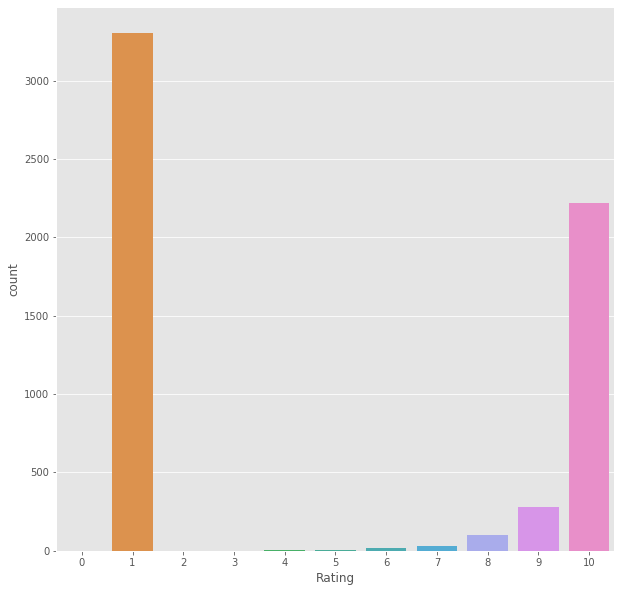

In [169]:
sns.countplot(df_train['Rating'].sort_index())
fig = plt.gcf()
fig.set_size_inches(10,10)

**For the majority, ratings are not available and hence 1 rating is the maximum. Other than that, we have the 10 rating as the second majority followed by 9, 8, 7 and 6.**

 Bangalore             1258
 Mumbai                1219
 Delhi                 1185
 Hyderabad              951
 Chennai                855
 Coimbatore             228
 Ernakulam              153
 Thiruvananthapuram      86
NA                       25
e                         1
Name: City, dtype: int64

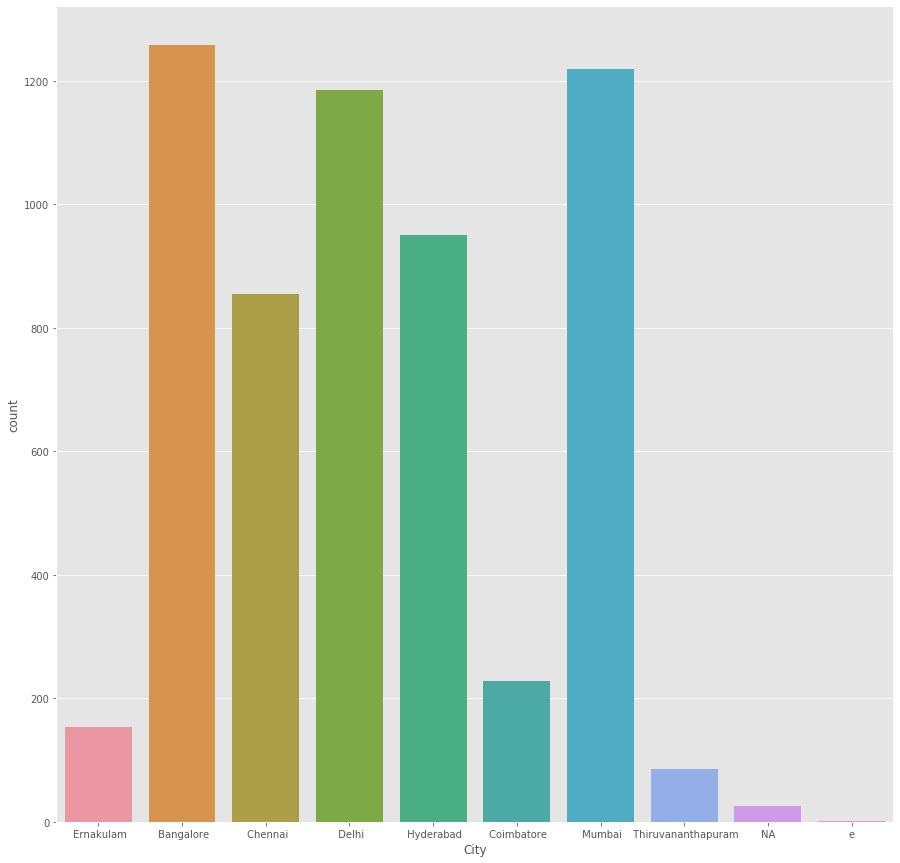

In [170]:
#Now, let us see how much doctors belong to which city
sns.countplot(df_train['City'])
fig = plt.gcf()
fig.set_size_inches(15,15)
df_train['City'].value_counts()

**In the above visual, we see that maximum doctors belong to Bangalore while minimum are from Thiruvananthapuram. Also, there is a stray value in the name of 'e'. We can replace it with NA.**

In [171]:
df_train['City'].replace(to_replace='e', value='NA', inplace=True)

In [172]:
#Let's Check our replacement
df_train['City'].value_counts()

 Bangalore             1258
 Mumbai                1219
 Delhi                 1185
 Hyderabad              951
 Chennai                855
 Coimbatore             228
 Ernakulam              153
 Thiruvananthapuram      86
NA                       26
Name: City, dtype: int64

Dentist             1397
General Medicine    1173
Dermatologists      1034
Homeopath            843
Ayurveda             786
ENT Specialist       728
Name: Profile, dtype: int64

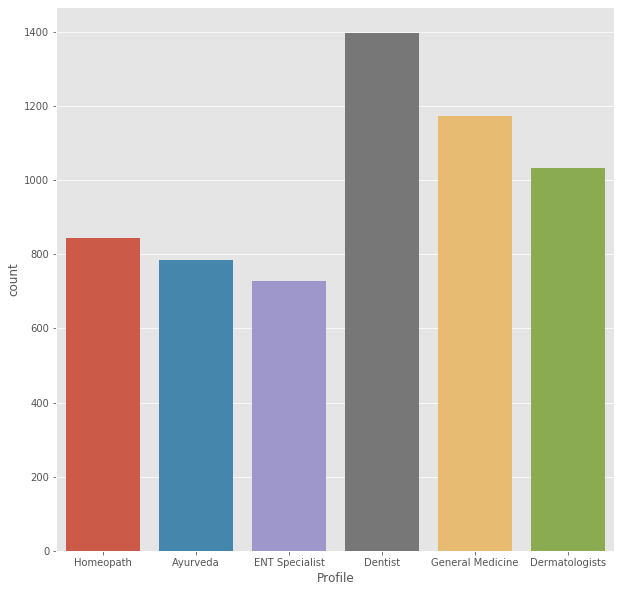

In [173]:
#let's count the profiles in our data
sns.countplot(df_train['Profile'])
fig = plt.gcf()
fig.set_size_inches(10,10)
df_train['Profile'].value_counts()

## Bivariate Analysis

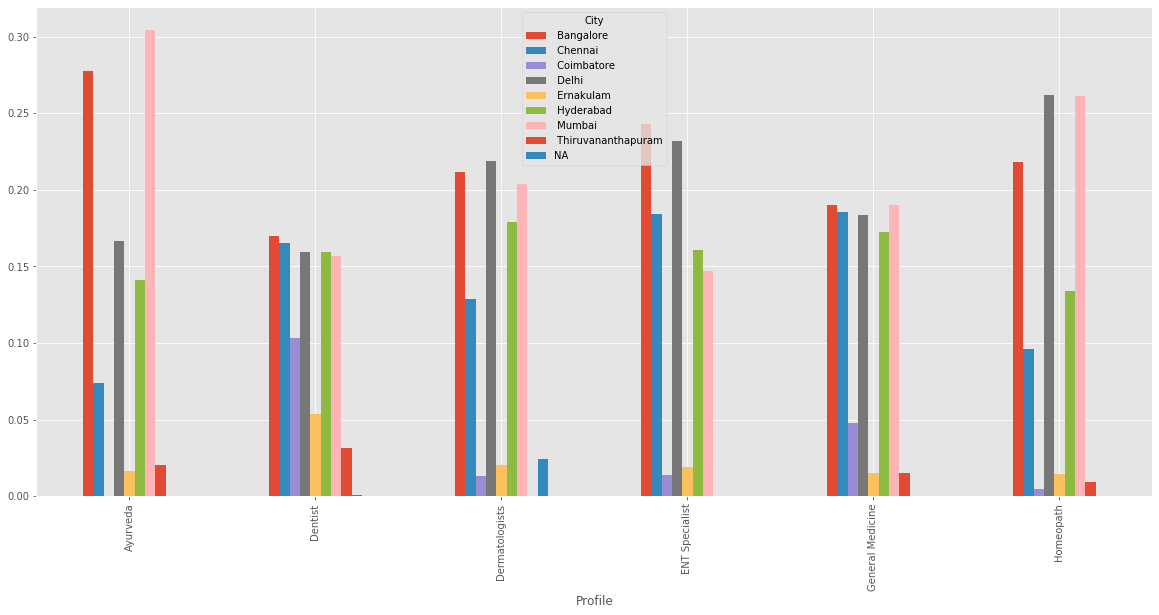

In [174]:
#here, we can see which city is using which type of a doctor
n=pd.crosstab(df_train['Profile'],df_train['City'])
n.div(n.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(20,9))

1. Ayurvedic doctors are needed maximum in bangalore while minimum in coimbatore.
2. Dentists are needed maximum in Bangalore and minimum in Ernakulam.
3. Dermatologists are needed maximum in Delhi. This can also mean that Delhiites suffer from skin problems the most(This can be a hypothesis).
4. Also, Homeopathy is preferred by Delhiites more than any other place

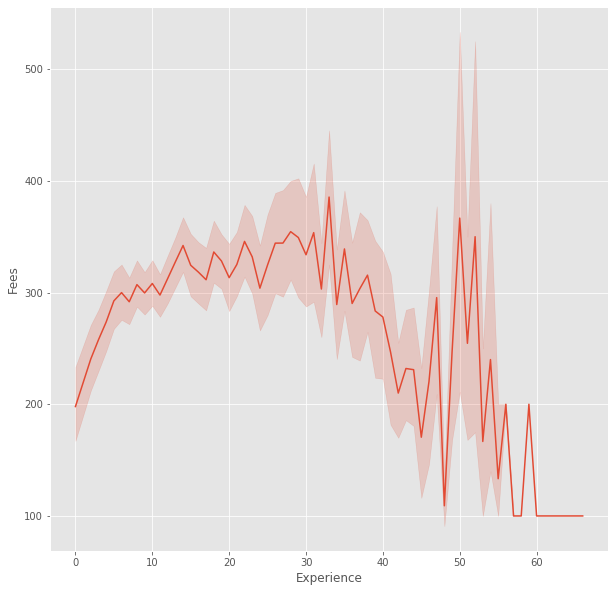

In [175]:
sns.lineplot(x='Experience',y='Fees',data=df_train)
fig = plt.gcf()
fig.set_size_inches(10,10)

**Average fees increased with experience and peak at approximately 27 years of experience, then, average fees decreased with further increasing number of experience.**

## Summary Statistics

In [176]:
df_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Experience,5961.0,17.303976,11.142798,0.0,9.0,14.0,23.0,66.0
Fees,5961.0,307.944640,190.920373,5.0,150.0,300.0,500.0,950.0
MBBS,5961.0,0.470559,0.499174,0.0,0.0,0.0,1.0,1.0
BDS,5961.0,0.228485,0.419892,0.0,0.0,0.0,0.0,1.0
BAMS,5961.0,0.127831,0.333929,0.0,0.0,0.0,0.0,1.0
BHMS,5961.0,0.125482,0.331293,0.0,0.0,0.0,0.0,1.0
MD - Dermatology,5961.0,0.101493,0.302006,0.0,0.0,0.0,0.0,1.0
MS - ENT,5961.0,0.068948,0.253387,0.0,0.0,0.0,0.0,1.0
Venereology & Leprosy,5961.0,0.049153,0.216205,0.0,0.0,0.0,0.0,1.0
MD - General Medicine,5961.0,0.047811,0.213384,0.0,0.0,0.0,0.0,1.0


1. Average experience of doctors is 17 years
2. Average Fees charged is Rs 307.9
3. Max experience in doctors is 66 years
4. max fees charged is Rs 950 while Min fees charged is Rs 5.

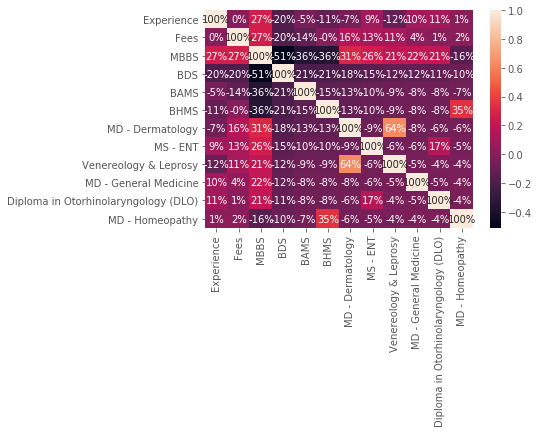

In [177]:
#Correlation
sns.heatmap(df_train.corr(), annot=True, fmt='.0%')

### Removing Outliers

In [178]:
#We only have one Numerical column and that is experience. We only need to remove the outliers from that
from scipy.stats import zscore
z=np.abs(zscore(df_train['Experience']))
z

array([0.60097885, 0.47604029, 0.74529508, ..., 2.12675597, 0.20678551,
       0.02728232])

In [179]:
threshold=3
print(np.where(z>3))

(array([ 105,  110,  183,  325,  372,  901, 1009, 1111, 1860, 1981, 2023,
       2062, 2202, 2262, 2281, 2631, 3180, 3478, 3493, 3608, 3942, 3960,
       4167, 4212, 4257, 4344, 4763, 4775, 5265, 5277, 5410, 5422, 5587,
       5637, 5664, 5720, 5807, 5942], dtype=int64),)


In [180]:
#Dropping all the rows with above indexes
rows = df_train.index[[105,  110,  183,  325,  372,  901, 1009, 1111, 1860, 1981, 2023,
       2062, 2202, 2262, 2281, 2631, 3180, 3478, 3493, 3608, 3942, 3960,
       4167, 4212, 4257, 4344, 4763, 4775, 5265, 5277, 5410, 5422, 5587,
       5637, 5664, 5720, 5807, 5942]]
df_train.drop(rows, inplace=True)

In [181]:
#Splitting the data into input and output variable
x=df_train.drop(columns=['Fees'], axis=1)
x.head()

,Experience,Rating,Profile,City,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
0,24,10,Homeopath,Ernakulam,0,0,0,1,0,0,0,0,0,1
1,12,10,Ayurveda,Bangalore,0,0,1,0,0,0,0,0,0,0
2,9,1,ENT Specialist,Bangalore,1,0,0,0,0,0,0,0,0,0
3,12,1,Ayurveda,Bangalore,0,0,1,0,0,0,0,0,0,0
4,20,10,Ayurveda,Chennai,0,0,1,0,0,0,0,0,0,0


In [182]:
y=df_train['Fees']
y.head()


0    100
1    350
2    300
3    250
4    250
Name: Fees, dtype: int64

In [183]:
#Checking the shape of input and target variable
print(x.shape,'\t\t',y.shape)

(5923, 14) 		 (5923,)


In [184]:
# Now, we need to get dummies for the City and Profile columns
x = pd.get_dummies(x,columns=["City","Profile"],prefix=["City","Profile"])

In [185]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5923 entries, 0 to 5960
Data columns (total 27 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   Experience                            5923 non-null   int32   
 1   Rating                                5923 non-null   category
 2   MBBS                                  5923 non-null   int64   
 3   BDS                                   5923 non-null   int64   
 4   BAMS                                  5923 non-null   int64   
 5   BHMS                                  5923 non-null   int64   
 6   MD - Dermatology                      5923 non-null   int64   
 7   MS - ENT                              5923 non-null   int64   
 8   Venereology & Leprosy                 5923 non-null   int64   
 9   MD - General Medicine                 5923 non-null   int64   
 10  Diploma in Otorhinolaryngology (DLO)  5923 non-null   int64   
 11  MD -

# Label Encoding of Rating and Qualifications
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
x['Rating'] = encoder.fit_transform(x['Rating'])


In [186]:
#Splitting the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y,random_state=42,test_size=0.20)

In [187]:
#Checking the shape
print(x_train.shape,'\t',x_test.shape)

(4738, 27) 	 (1185, 27)


In [188]:
#Importing our models Library
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

#Importing Errors Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [189]:
#Importing Boosting models
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [190]:
#Using algorithms via for loop
import warnings
warnings.filterwarnings('ignore')

#RMSE Scores (Train & Test)
model=[LinearRegression(),DecisionTreeRegressor(),KNeighborsRegressor(),SVR(), Lasso(), Ridge(), ElasticNet(), RandomForestRegressor(), AdaBoostRegressor(), GradientBoostingRegressor()]
for m in model:
    m.fit(x_train,y_train)
    print('train_score of',m,'is',m.score(x_train,y_train))
    pred_train=m.predict(x_train)
    pred_test=m.predict(x_test)
    print('Error_train:')
    print('Mean absolute error_train: ',mean_absolute_error(y_train,pred_train))
    print('Mean squared error_train: ',mean_squared_error(y_train,pred_train))
    print('Root mean squared error_train: ',np.sqrt(mean_squared_error(y_train,pred_train)))
    print('r2 score_train: ',r2_score(y_train,pred_train))
    print('***********************************************************************')
    print('\n')
    print('test_score of',m,'is',m.score(x_test,y_test))
    print('Error_test:')
    print('Mean absolute error_test: ',mean_absolute_error(y_test,pred_test))
    print('Mean squared error_test: ',mean_squared_error(y_test,pred_test))
    print('Root mean squared error_test: ',np.sqrt(mean_squared_error(y_test,pred_test)))
    print('r2 score_test: ',r2_score(y_test,pred_test))
    print('***********************************************************************')
    print('\n')

train_score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) is 0.18949781021266188
Error_train:
Mean absolute error_train:  136.82797378578687
Mean squared error_train:  29860.90944540283
Root mean squared error_train:  172.80309443237073
r2 score_train:  0.18949781021266188
***********************************************************************


test_score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) is 0.14825444800120868
Error_test:
Mean absolute error_test:  135.8895746412683
Mean squared error_test:  29818.113176422325
Root mean squared error_test:  172.67922045348226
r2 score_test:  0.14825444800120868
***********************************************************************


train_score of DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
               

In [191]:
#Cross validate the models Code_r2 as scoring parameter:
from sklearn.model_selection import cross_val_score
model=[LinearRegression(),DecisionTreeRegressor(),KNeighborsRegressor(),SVR(), Lasso(), Ridge(), ElasticNet(), RandomForestRegressor(), AdaBoostRegressor(), GradientBoostingRegressor()]
for m in model:
    train_data_score=cross_val_score(m,x_train,y_train,cv=7,scoring='r2')
    test_data_score=cross_val_score(m,x_test,y_test,cv=7,scoring='r2')
    print('train_data_score of',m,'is: ')
    print('Score: ',train_data_score)
    print('Mean Score:',train_data_score.mean())
    print('Standard Deviation',train_data_score.std())
    print('**********************************************************')
    print('test_data_score of',m,'is: ')
    print('Score: ',test_data_score)
    print('Mean Score:',test_data_score.mean())
    print('Standard Deviation',test_data_score.std())
    print('**********************************************************')
    print('\n')

train_data_score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) is: 
Score:  [0.16385548 0.16656698 0.15363122 0.21089449 0.2141665  0.16418449
 0.19650162]
Mean Score: 0.18140011269860756
Standard Deviation 0.02319770737932646
**********************************************************
test_data_score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) is: 
Score:  [0.17364503 0.11716452 0.07595194 0.18193549 0.12383948 0.14223614
 0.15418437]
Mean Score: 0.1384224238766986
Standard Deviation 0.03373028546640439
**********************************************************


train_data_score of DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='depr

In [195]:
#Due to unknown reasons, the model score is not good

In [196]:
#Saving the model
from sklearn.externals import joblib
joblib.dump(Ridge(),'Doc.obj')

['Doc.obj']